In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load dataset and display table

In [2]:
df = pd.read_csv("Clothing.csv", delimiter=",")

df = df.sort_values(['start'], ascending=True)
df = df.dropna()

df = df.reset_index(drop=True)

df.head(10)  #only display first 10 row

,tsale,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,976817,6105.106,31.0,2.0,1.0000,1.0000,1.3673,126,23.47549,22207.04,22859.85,160,1945
1,750000,8823.529,42.0,1.0,1.0000,1.2833,1.3673,84,18.06219,22207.04,22859.85,85,1945
2,694227,7713.633,41.0,1.0,1.9231,1.0000,1.0000,62,12.59369,2500.00,2500.00,90,1945
3,955867,6827.622,43.0,1.0,2.0000,3.0000,1.5357,122,16.18960,9000.00,7600.00,140,1945
4,565400,14135.000,44.0,1.0,3.0000,2.0741,1.3333,167,22.54502,62269.23,5000.00,40,1945
5,694227,5833.840,41.0,2.0,2.2656,1.0000,1.3333,108,16.36636,62269.23,16624.89,119,1945
6,495340,4953.400,37.0,1.0,1.9556,1.0000,1.3673,74,13.90220,22207.04,5000.00,100,1945
7,845000,4225.000,40.0,1.0,1.0000,2.0000,1.0000,144,28.80000,17166.67,27177.04,200,1946
8,495340,6604.533,44.0,2.0,2.2656,2.0741,1.0000,104,14.16952,62269.23,16624.89,75,1946
9,716000,7955.556,38.0,1.0,2.0000,2.0741,2.0000,108,15.26696,62269.23,1750.00,90,1946


### Define how many rows dataset from the particular year

In [3]:
df1 = df.groupby(['start']).size()

df1 = df1.to_frame().reset_index()

df1.rename(columns={0: 'count'}, inplace=True)

df1.head(10)

,start,count
0,1945,7
1,1946,7
2,1947,6
3,1948,6
4,1949,8
5,1950,10
6,1951,6
7,1952,5
8,1953,7
9,1954,5


#### Example for displaying all row  from year 1945

In [4]:
df1 = df.loc[df['start'] == 1945]

df1

,tsale,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,976817,6105.106,31.0,2.0,1.0000,1.0000,1.3673,126,23.47549,22207.04,22859.85,160,1945
1,750000,8823.529,42.0,1.0,1.0000,1.2833,1.3673,84,18.06219,22207.04,22859.85,85,1945
2,694227,7713.633,41.0,1.0,1.9231,1.0000,1.0000,62,12.59369,2500.00,2500.00,90,1945
3,955867,6827.622,43.0,1.0,2.0000,3.0000,1.5357,122,16.18960,9000.00,7600.00,140,1945
4,565400,14135.000,44.0,1.0,3.0000,2.0741,1.3333,167,22.54502,62269.23,5000.00,40,1945
5,694227,5833.840,41.0,2.0,2.2656,1.0000,1.3333,108,16.36636,62269.23,16624.89,119,1945
6,495340,4953.400,37.0,1.0,1.9556,1.0000,1.3673,74,13.90220,22207.04,5000.00,100,1945


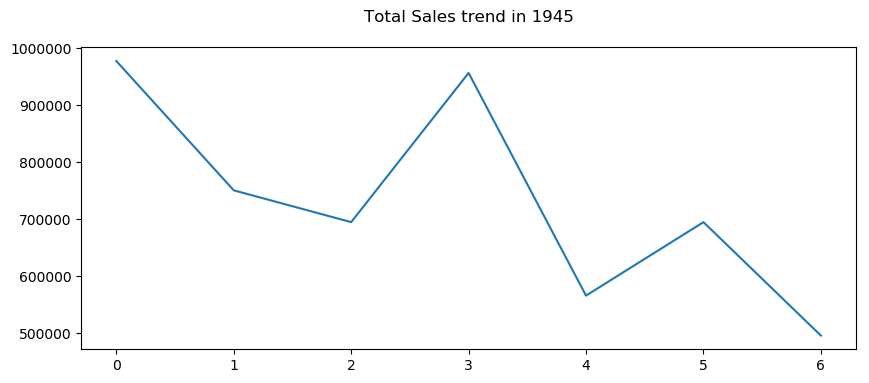

In [5]:
plt.figure(dpi=100, figsize=(10,4))

plt.title("Total Sales trend in 1945\n") 
plt.plot(range(0,len(df1)), df1.tsale.values) 
plt.show() 

<br><br>
### Maximum sale for each year

#### Group the maximum sale by year
  

In [6]:
df_maxsale = pd.DataFrame()

indices = df.groupby('start')['tsale'].idxmax

df_maxsale = df.loc[indices].reset_index(drop=True)

df_maxsale.head(10)

,tsale,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,976817,6105.106,31.0,2.0000,1.0000,1.0000,1.3673,126,23.47549,22207.04,22859.85,160,1945
1,976817,2790.906,28.0,1.0000,1.0000,2.2222,1.4091,117,20.77673,1500000.00,300000.00,350,1946
2,960000,7680.000,35.0,2.0000,2.2656,2.0741,1.3333,100,13.03271,62269.23,16624.89,125,1947
3,1926395,13759.960,49.0,1.2857,2.0000,2.0000,2.0000,136,18.66670,17166.67,27177.04,140,1948
4,1340000,8375.000,43.0,2.0000,1.0000,2.0000,1.3333,179,28.26331,62269.23,13000.00,160,1949
5,4000000,9302.325,41.0,1.0000,7.0000,1.0000,1.3673,359,34.62811,22207.04,22859.85,430,1950
6,5000000,16666.670,40.0,1.0000,8.0000,9.0000,1.0000,120,6.31579,292857.20,126800.00,300,1951
7,1600000,3200.000,39.0,2.0000,5.0000,2.2222,1.4091,280,26.33732,400000.00,400000.00,500,1952
8,1926395,12842.630,44.0,1.0000,5.0000,4.0000,1.4091,297,26.03185,292857.20,71570.55,150,1953
9,3545901,23639.340,45.0,1.0000,4.0000,1.0000,1.3673,228,30.94757,22207.04,12000.00,150,1954



#### Visualization of the maximum sale each year

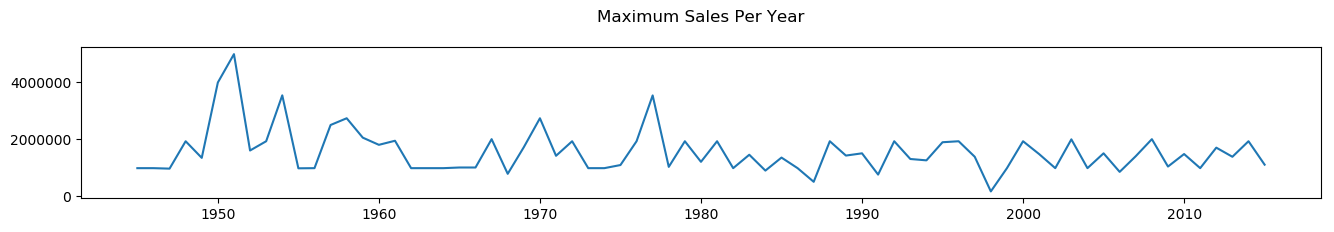

In [7]:
plt.figure(dpi=100, figsize=(16,2))

plt.title("Maximum Sales Per Year\n") 
plt.plot(df_maxsale.start, df_maxsale.tsale.values) 
plt.show() 

<br><br>
### Minimum sale for each year

#### Group the minimum sale by year

In [8]:
df_minsale = pd.DataFrame()

indices = df.groupby('start')['tsale'].idxmin

df_minsale = df.loc[indices].reset_index(drop=True)

df_minsale.head(10)

,tsale,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
0,495340,4953.400,37.0,1.0,1.9556,1.0000,1.3673,74,13.902200,22207.04,5000.00,100,1945
1,495340,6604.533,44.0,2.0,2.2656,2.0741,1.0000,104,14.169520,62269.23,16624.89,75,1946
2,126179,3154.475,33.0,1.0,1.9556,1.2833,1.3673,52,9.275445,22207.04,600.00,40,1947
3,495340,6191.750,39.0,1.0,1.0000,1.0000,1.3333,131,30.231000,15000.00,16624.89,80,1948
4,156168,6246.720,36.0,1.0,1.9556,1.2833,1.3673,60,10.702440,22207.04,22859.85,25,1949
5,77369,1547.380,23.0,1.0,1.9556,1.2833,1.3673,43,7.670080,22207.04,22859.85,50,1950
6,694227,4083.688,42.0,1.0,1.9556,1.0000,1.3673,72,13.526460,22207.04,22859.85,170,1951
7,495340,4953.400,28.0,2.0,1.9556,1.2833,1.3673,80,12.109840,22207.04,22859.85,100,1952
8,50000,3125.000,30.0,1.0,1.9556,1.2833,1.3673,40,7.134958,22207.04,22859.85,16,1953
9,495340,4127.833,40.0,1.0,1.9231,1.0000,1.5357,114,20.883710,11000.00,27177.04,120,1954



#### Visualization of the minimum sale each year

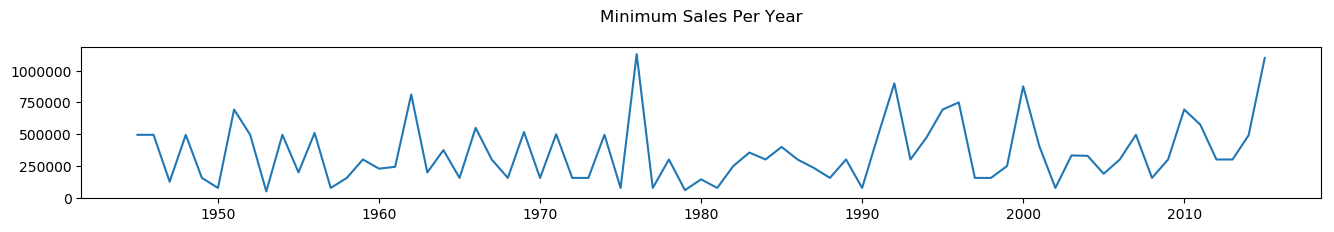

In [9]:
plt.figure(dpi=100, figsize=(16,2))

plt.title("Minimum Sales Per Year\n") 
plt.plot(df_minsale.start, df_minsale.tsale.values) 
plt.show() 

#### Normalize and split data into 70% for training and 30% for testing 

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[df.columns[1:12]].values
y = df[df.columns[0:1]].values

modelscore = []
modelmae = []
modelmse = []

scaler = MinMaxScaler()

xscale = scaler.fit_transform(X)
yscale = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<br>
### Linear Regression Model

#### Try to fit the linear regression model with the data

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Coefficient value (Linear Regression compulsary)

In [12]:
for idx, col_name in enumerate(df.columns[1:12]):
    print("The coefficient for {} is : {}".format(col_name, regressor.coef_[0][idx]))

The coefficient for sales is : 0.42583464161120843
The coefficient for margin is : -0.06673287900233493
The coefficient for nown is : 0.1367749183553139
The coefficient for nfull is : 0.2888491507596114
The coefficient for npart is : 0.3186812644143305
The coefficient for naux is : 0.0993119558732897
The coefficient for hoursw is : -0.4090103924626122
The coefficient for hourspw is : 0.33879868494744314
The coefficient for inv1 is : -0.049466172104302646
The coefficient for inv2 is : 0.019118187430921973
The coefficient for ssize is : 0.4953901699594367


#### Run Linear Regression model with 100 number of iterations

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

listscore = []
listmae = []
listmse = []

for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = regressor.score(X_test, y_test)
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    print('Linear Regression R squared: %.4f' % score)
    print('Linear Regression Mean Absolute Error: %.4f' % mae)
    print('Linear Regression Mean Squared Error: %.4f\n' % mse)
    listscore.append(score)
    listmae.append(mae)
    listmse.append(mse)

Linear Regression R squared: 0.6232
Linear Regression Mean Absolute Error: 0.0370
Linear Regression Mean Squared Error: 0.0056

Linear Regression R squared: 0.6146
Linear Regression Mean Absolute Error: 0.0410
Linear Regression Mean Squared Error: 0.0081

Linear Regression R squared: 0.5823
Linear Regression Mean Absolute Error: 0.0374
Linear Regression Mean Squared Error: 0.0043

Linear Regression R squared: 0.7635
Linear Regression Mean Absolute Error: 0.0381
Linear Regression Mean Squared Error: 0.0035

Linear Regression R squared: 0.7249
Linear Regression Mean Absolute Error: 0.0355
Linear Regression Mean Squared Error: 0.0039

Linear Regression R squared: 0.8079
Linear Regression Mean Absolute Error: 0.0275
Linear Regression Mean Squared Error: 0.0015

Linear Regression R squared: 0.7722
Linear Regression Mean Absolute Error: 0.0341
Linear Regression Mean Squared Error: 0.0022

Linear Regression R squared: 0.8166
Linear Regression Mean Absolute Error: 0.0319
Linear Regression Mean

Linear Regression R squared: 0.8032
Linear Regression Mean Absolute Error: 0.0341
Linear Regression Mean Squared Error: 0.0022

Linear Regression R squared: 0.5032
Linear Regression Mean Absolute Error: 0.0406
Linear Regression Mean Squared Error: 0.0091

Linear Regression R squared: 0.6935
Linear Regression Mean Absolute Error: 0.0430
Linear Regression Mean Squared Error: 0.0046

Linear Regression R squared: 0.7733
Linear Regression Mean Absolute Error: 0.0301
Linear Regression Mean Squared Error: 0.0019

Linear Regression R squared: 0.7541
Linear Regression Mean Absolute Error: 0.0331
Linear Regression Mean Squared Error: 0.0023

Linear Regression R squared: 0.7866
Linear Regression Mean Absolute Error: 0.0339
Linear Regression Mean Squared Error: 0.0032

Linear Regression R squared: 0.7668
Linear Regression Mean Absolute Error: 0.0321
Linear Regression Mean Squared Error: 0.0034

Linear Regression R squared: 0.7721
Linear Regression Mean Absolute Error: 0.0354
Linear Regression Mean

#### Prediction result obtained from the model on testing set

In [14]:
df_result = pd.DataFrame()

y_pred = [float(i) for i in y_pred]
y_pred = [ '%.6f' % x for x in y_pred ]
df_result['Actual'] = y_test.reshape(-1)
df_result['Predicted'] = y_pred

df_result.head(20)

,Actual,Predicted
0,0.074747,0.196425
1,0.030304,0.016308
2,0.542970,0.339461
3,0.065657,0.162856
4,0.119192,0.128788
5,0.191919,0.166743
6,0.146877,0.141457
7,0.187236,0.178051
8,0.146465,0.206587
9,0.050734,0.040831


#### Linear Regression Visualization for:
<ol>
    <li>Actual vs Predicted Values</li>
    <li>R squared</li>
    <li>Mean Absolute Error</li>
    <li>Mean Squared Error</li>
    </ol>

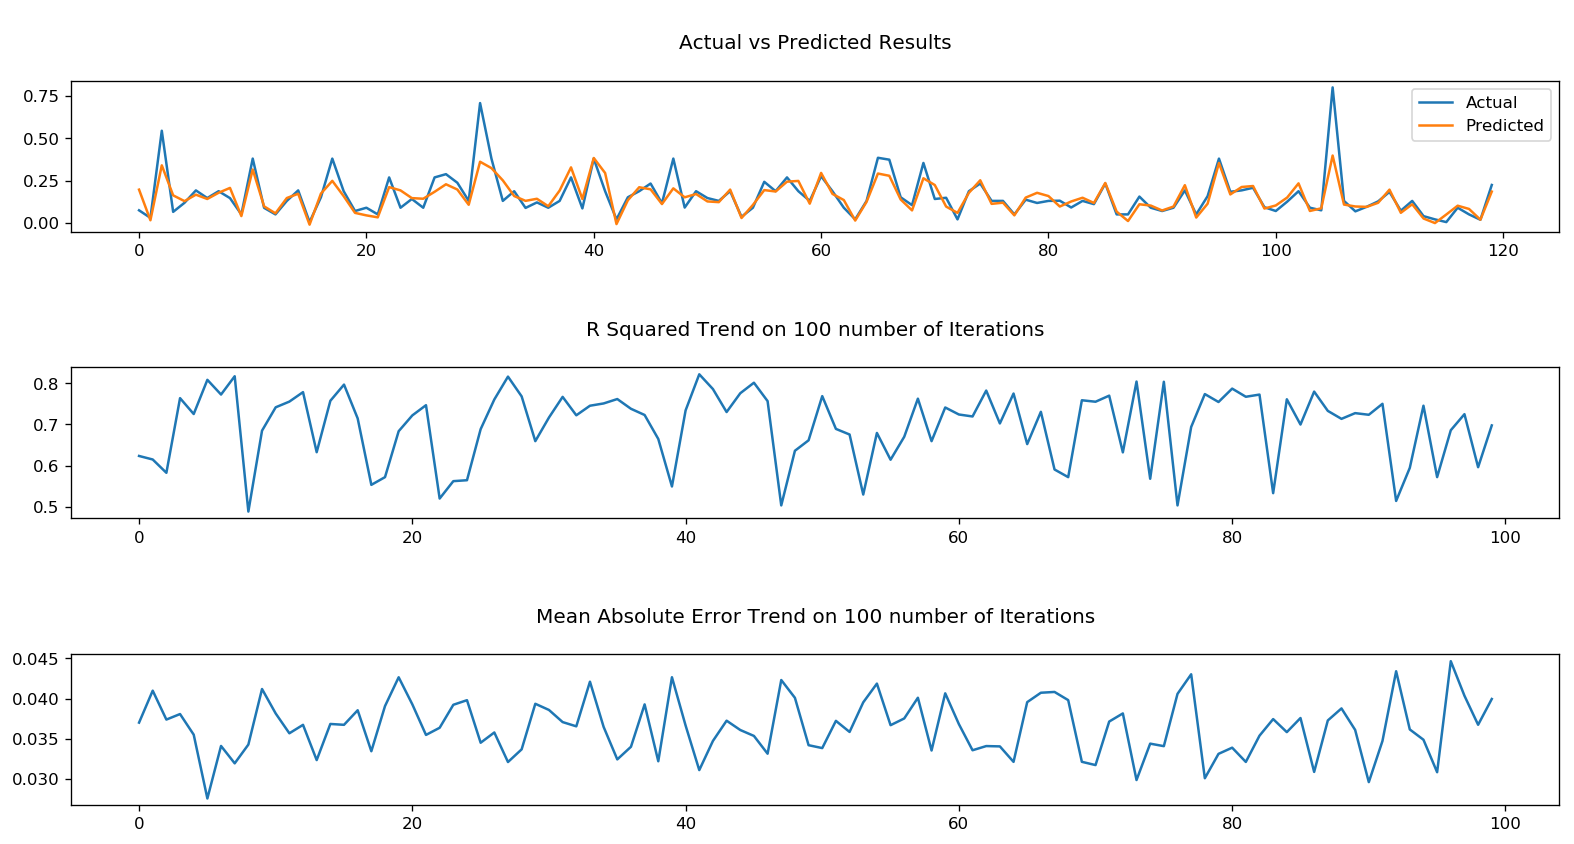

In [15]:
from math import sqrt
from math import ceil

fig = plt.figure(dpi=120, figsize=(16,8))
fig.subplots_adjust(hspace=0.9, wspace=0.6)


df_result.Predicted = df_result.Predicted.apply(float)

plt.subplot(3, 1, 1)
plt.plot(df_result.Actual)
plt.plot(df_result.Predicted)
plt.title("\nActual vs Predicted Results\n") 
plt.legend()

plt.subplot(3, 1, 2)
plt.title("R Squared Trend on 100 number of Iterations\n") 
plt.plot(listscore) 

plt.subplot(3, 1, 3)
plt.title("Mean Absolute Error Trend on 100 number of Iterations\n") 
plt.plot(listmae) 

plt.show() 

<br>
### Random Forest Model

#### Try to fit the Random Forest model with the data

In [16]:
from sklearn.ensemble import RandomForestRegressor

listscore = []
listmae = []
listmse = []

yscale = yscale.ravel()

for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.3)
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = regressor.score(X_test, y_test)
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    print('Random Forest R squared: %.4f' % score)
    print('Random Forest Mean Absolute Error: %.4f' % mae)
    print('Random Forest Mean Squared Error: %.4f\n' % mse)
    listscore.append(score)
    listmae.append(mae)
    listmse.append(mse)


Random Forest R squared: 0.7575
Random Forest Mean Absolute Error: 0.0273
Random Forest Mean Squared Error: 0.0019

Random Forest R squared: 0.5632
Random Forest Mean Absolute Error: 0.0418
Random Forest Mean Squared Error: 0.0091

Random Forest R squared: 0.7067
Random Forest Mean Absolute Error: 0.0371
Random Forest Mean Squared Error: 0.0048

Random Forest R squared: 0.8300
Random Forest Mean Absolute Error: 0.0267
Random Forest Mean Squared Error: 0.0017

Random Forest R squared: 0.5959
Random Forest Mean Absolute Error: 0.0318
Random Forest Mean Squared Error: 0.0063

Random Forest R squared: 0.5763
Random Forest Mean Absolute Error: 0.0374
Random Forest Mean Squared Error: 0.0085

Random Forest R squared: 0.8228
Random Forest Mean Absolute Error: 0.0291
Random Forest Mean Squared Error: 0.0026

Random Forest R squared: 0.4750
Random Forest Mean Absolute Error: 0.0379
Random Forest Mean Squared Error: 0.0083

Random Forest R squared: 0.6766
Random Forest Mean Absolute Error: 0.035

Random Forest R squared: 0.7157
Random Forest Mean Absolute Error: 0.0321
Random Forest Mean Squared Error: 0.0030

Random Forest R squared: 0.5780
Random Forest Mean Absolute Error: 0.0330
Random Forest Mean Squared Error: 0.0063

Random Forest R squared: 0.7630
Random Forest Mean Absolute Error: 0.0324
Random Forest Mean Squared Error: 0.0030

Random Forest R squared: 0.8255
Random Forest Mean Absolute Error: 0.0260
Random Forest Mean Squared Error: 0.0020

Random Forest R squared: 0.7352
Random Forest Mean Absolute Error: 0.0293
Random Forest Mean Squared Error: 0.0029

Random Forest R squared: 0.7407
Random Forest Mean Absolute Error: 0.0290
Random Forest Mean Squared Error: 0.0027

Random Forest R squared: 0.5909
Random Forest Mean Absolute Error: 0.0334
Random Forest Mean Squared Error: 0.0060

Random Forest R squared: 0.7656
Random Forest Mean Absolute Error: 0.0328
Random Forest Mean Squared Error: 0.0033

Random Forest R squared: 0.5021
Random Forest Mean Absolute Error: 0.036

#### Prediction result obtained from the model on testing set

In [17]:
df_result = pd.DataFrame()

y_pred = [float(i) for i in y_pred]
y_pred = [ '%.6f' % x for x in y_pred ]
df_result['Actual'] = y_test.reshape(-1)
df_result['Predicted'] = y_pred

df_result.head(20)

,Actual,Predicted
0,0.797980,0.619343
1,0.379070,0.434216
2,0.272727,0.238143
3,0.141414,0.207001
4,0.121212,0.130788
5,0.133669,0.163085
6,0.146942,0.147571
7,0.706243,0.371913
8,0.089968,0.077743
9,0.039094,0.047121


#### Random Forest Visualization for:
<ol>
    <li>Actual vs Predicted Values</li>
    <li>R squared</li>
    <li>Mean Absolute Error</li>
    <li>Mean Squared Error</li>
    </ol>

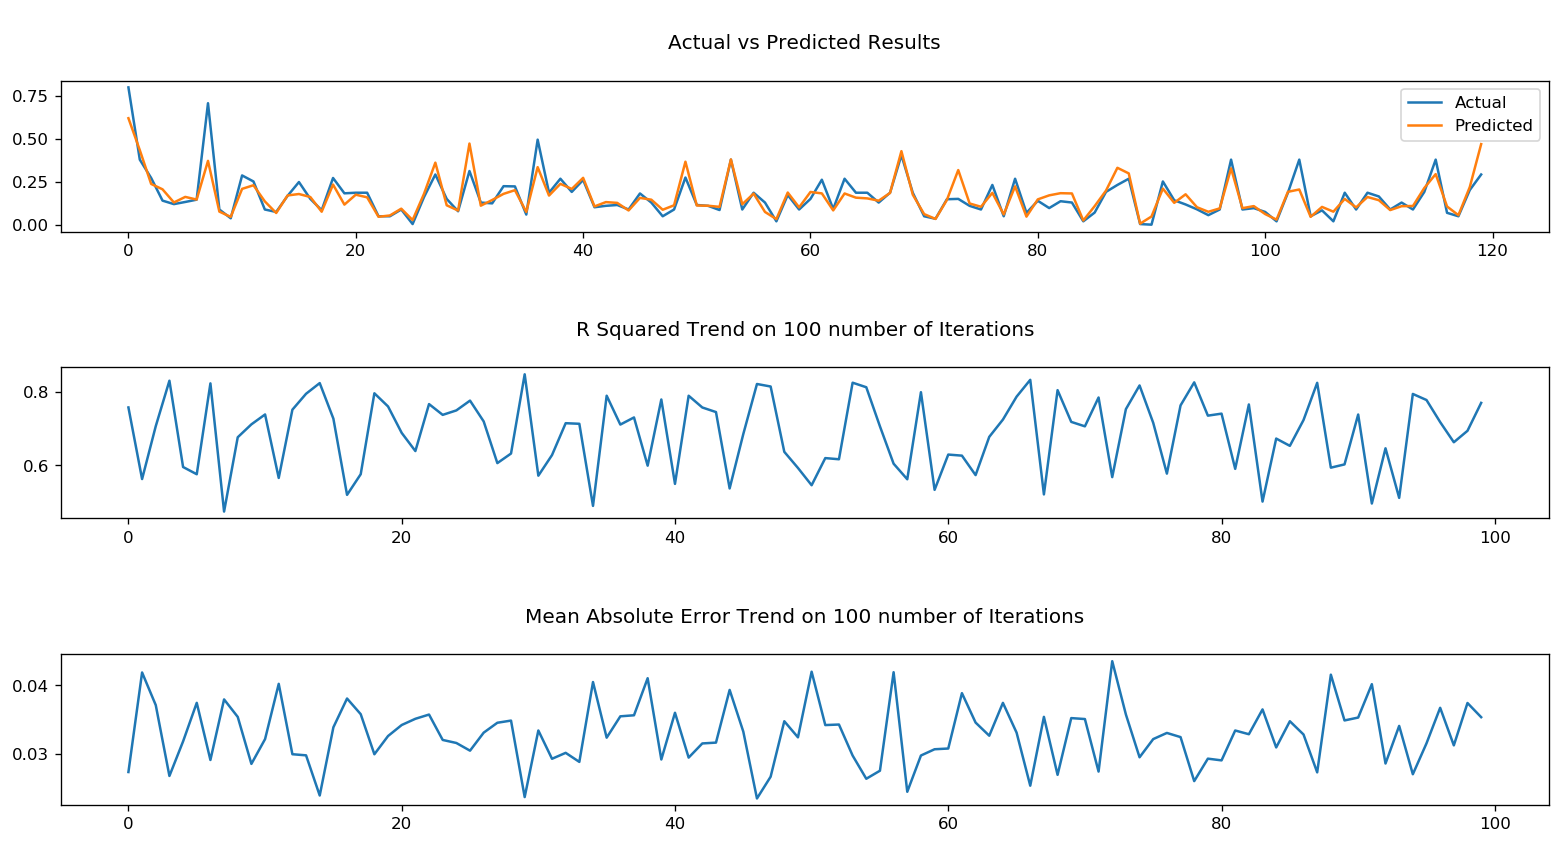

In [18]:
from math import sqrt
from math import ceil

fig = plt.figure(dpi=120, figsize=(16,8))
fig.subplots_adjust(hspace=0.9, wspace=0.6)

df_result.Predicted = df_result.Predicted.apply(float)

plt.subplot(3, 1, 1)
plt.plot(df_result.Actual)
plt.plot(df_result.Predicted)
plt.title("\nActual vs Predicted Results\n") 
plt.legend()

plt.subplot(3, 1, 2)
plt.title("R Squared Trend on 100 number of Iterations\n") 
plt.plot(listscore) 

plt.subplot(3, 1, 3)
plt.title("Mean Absolute Error Trend on 100 number of Iterations\n") 
plt.plot(listmae) 

plt.show()

<br>
### Gradient Boosting Model

#### Try to fit the Gradient Boosting model with the data

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

listscore = []
listmae = []
listmse = []

for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.3)
    regressor = GradientBoostingRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    score = regressor.score(X_test, y_test)
    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    print('Gradient Booster R squared: %.4f' % score)
    print('Gradient Booster Mean Absolute Error: %.4f' % mae)
    print('Gradient Booster Squared Error: %.4f\n' % mse)
    listscore.append(score)
    listmae.append(mae)
    listmse.append(mse)

Gradient Booster R squared: 0.9322
Gradient Booster Mean Absolute Error: 0.0148
Gradient Booster Squared Error: 0.0006

Gradient Booster R squared: 0.7536
Gradient Booster Mean Absolute Error: 0.0294
Gradient Booster Squared Error: 0.0059

Gradient Booster R squared: 0.8254
Gradient Booster Mean Absolute Error: 0.0259
Gradient Booster Squared Error: 0.0024

Gradient Booster R squared: 0.8838
Gradient Booster Mean Absolute Error: 0.0226
Gradient Booster Squared Error: 0.0013

Gradient Booster R squared: 0.9058
Gradient Booster Mean Absolute Error: 0.0176
Gradient Booster Squared Error: 0.0012

Gradient Booster R squared: 0.8608
Gradient Booster Mean Absolute Error: 0.0207
Gradient Booster Squared Error: 0.0011

Gradient Booster R squared: 0.7550
Gradient Booster Mean Absolute Error: 0.0264
Gradient Booster Squared Error: 0.0031

Gradient Booster R squared: 0.8206
Gradient Booster Mean Absolute Error: 0.0277
Gradient Booster Squared Error: 0.0032

Gradient Booster R squared: 0.8409
Gradi

Gradient Booster R squared: 0.8535
Gradient Booster Mean Absolute Error: 0.0184
Gradient Booster Squared Error: 0.0012

Gradient Booster R squared: 0.9283
Gradient Booster Mean Absolute Error: 0.0173
Gradient Booster Squared Error: 0.0009

Gradient Booster R squared: 0.9360
Gradient Booster Mean Absolute Error: 0.0174
Gradient Booster Squared Error: 0.0007

Gradient Booster R squared: 0.8547
Gradient Booster Mean Absolute Error: 0.0215
Gradient Booster Squared Error: 0.0018

Gradient Booster R squared: 0.8824
Gradient Booster Mean Absolute Error: 0.0220
Gradient Booster Squared Error: 0.0016

Gradient Booster R squared: 0.8499
Gradient Booster Mean Absolute Error: 0.0281
Gradient Booster Squared Error: 0.0019

Gradient Booster R squared: 0.8726
Gradient Booster Mean Absolute Error: 0.0203
Gradient Booster Squared Error: 0.0016

Gradient Booster R squared: 0.8682
Gradient Booster Mean Absolute Error: 0.0213
Gradient Booster Squared Error: 0.0018

Gradient Booster R squared: 0.9222
Gradi

#### Prediction result obtained from the model on testing set

In [20]:
df_result = pd.DataFrame()

y_pred = [float(i) for i in y_pred]
y_pred = [ '%.6f' % x for x in y_pred ]
df_result['Actual'] = y_test.reshape(-1)
df_result['Predicted'] = y_pred

df_result.head(20)

,Actual,Predicted
0,0.797980,0.681223
1,0.089968,0.102841
2,0.089968,0.082332
3,0.218182,0.228349
4,0.070707,0.090619
5,0.130147,0.123718
6,0.268401,0.219020
7,0.095758,0.088051
8,0.130147,0.119186
9,0.228724,0.312633


#### Gradient Boosting Visualization for:
<ol>
    <li>Actual vs Predicted Values</li>
    <li>R squared</li>
    <li>Mean Absolute Error</li>
    <li>Mean Squared Error</li>
    </ol>

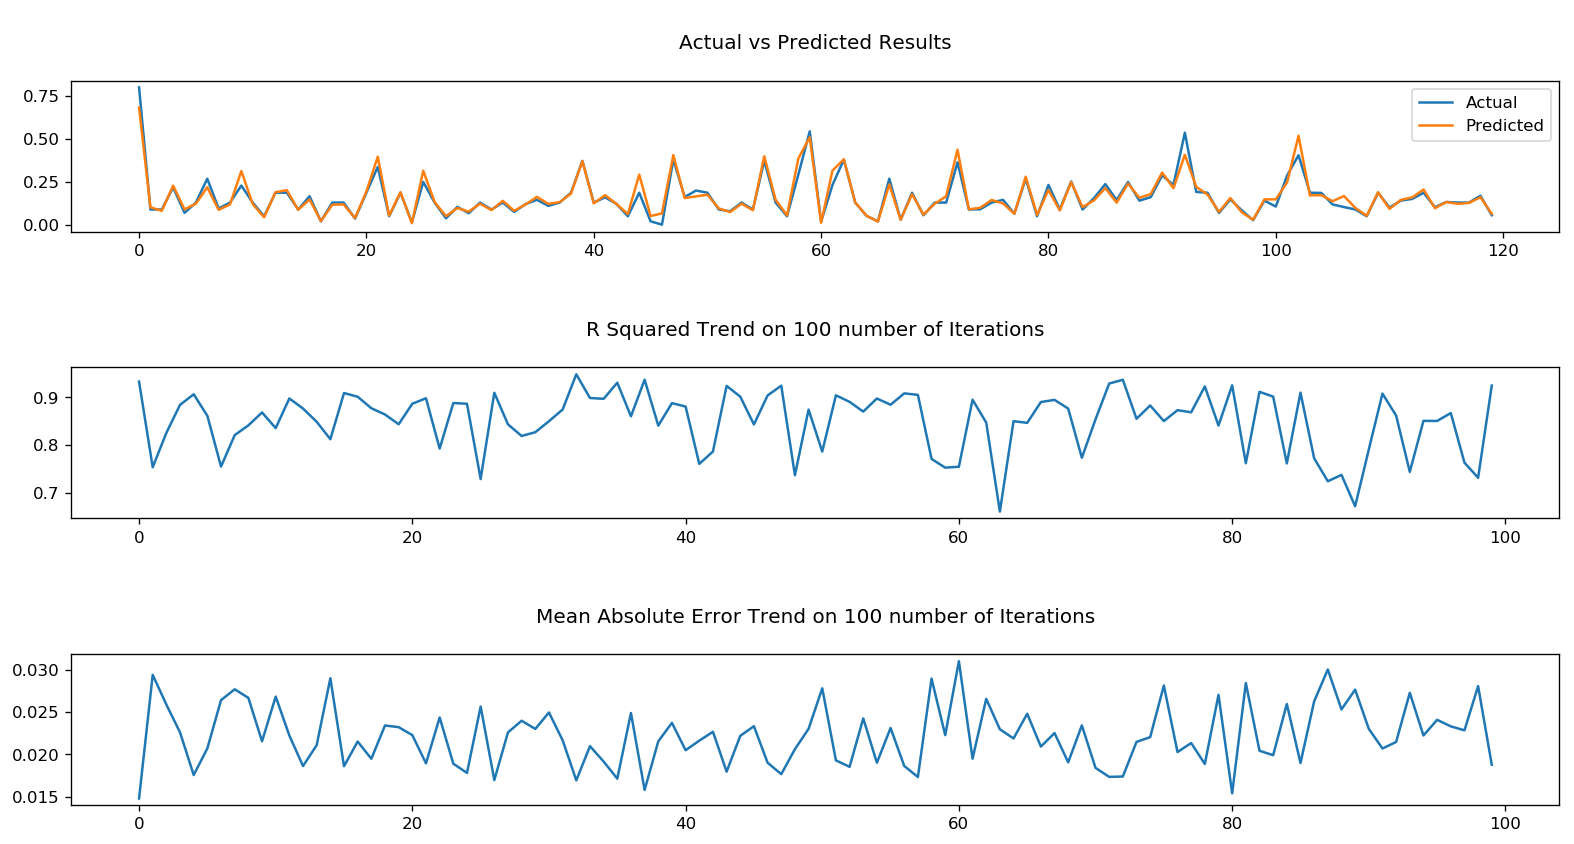

In [21]:
from math import sqrt
from math import ceil

fig = plt.figure(dpi=120, figsize=(16,8))
fig.subplots_adjust(hspace=0.9, wspace=0.6)


df_result.Predicted = df_result.Predicted.apply(float)

plt.subplot(3, 1, 1)
plt.plot(df_result.Actual)
plt.plot(df_result.Predicted)
plt.title("\nActual vs Predicted Results\n") 
plt.legend()

plt.subplot(3, 1, 2)
plt.title("R Squared Trend on 100 number of Iterations\n") 
plt.plot(listscore) 

plt.subplot(3, 1, 3)
plt.title("Mean Absolute Error Trend on 100 number of Iterations\n") 
plt.plot(listmae) 

plt.show()

In [22]:
LRscorelist = []
LRmaelist = []
LRmselist = []
RFscorelist = []
RFmaelist = []
RFmselist = []
GBscorelist = []
GBmaelist = []
GBmselist = []

for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.3)
    LR = LinearRegression()
    RF = RandomForestRegressor()
    GB = GradientBoostingRegressor()
    
    LR.fit(X_train, y_train)
    LRy_pred = LR.predict(X_test)
    LRscore = LR.score(X_test, y_test)
    LRmae = mean_absolute_error(LRy_pred, y_test)
    LRmse = mean_squared_error(LRy_pred, y_test)
    print('\nLinear Regression R squared: %.4f' % LRscore)
    print('Linear Regression Mean Absolute Error: %.4f' % LRmae)
    print('Linear Regression Squared Error: %.4f\n' % LRmse)
    LRscorelist.append(LRscore)
    LRmaelist.append(LRmae)
    LRmselist.append(LRmse)
    
    RF.fit(X_train, y_train)
    RFy_pred = RF.predict(X_test)
    RFscore = RF.score(X_test, y_test)
    RFmae = mean_absolute_error(RFy_pred, y_test)
    RFmse = mean_squared_error(RFy_pred, y_test)
    print('\nRandom Forest R squared: %.4f' % RFscore)
    print('Random Forest Mean Absolute Error: %.4f' % RFmae)
    print('Random Forest Squared Error: %.4f\n' % RFmse)
    RFscorelist.append(RFscore)
    RFmaelist.append(RFmae)
    RFmselist.append(RFmse)
    
    GB.fit(X_train, y_train)
    GBy_pred = GB.predict(X_test)
    GBscore = GB.score(X_test, y_test)
    GBmae = mean_absolute_error(GBy_pred, y_test)
    GBmse = mean_squared_error(GBy_pred, y_test)
    print('\nGradient Booster R squared: %.4f' % GBscore)
    print('Gradient Booster Mean Absolute Error: %.4f' % GBmae)
    print('Gradient Booster Squared Error: %.4f\n' % GBmse)
    GBscorelist.append(GBscore)
    GBmaelist.append(GBmae)
    GBmselist.append(GBmse)



Linear Regression R squared: 0.7381
Linear Regression Mean Absolute Error: 0.0393
Linear Regression Squared Error: 0.0035


Random Forest R squared: 0.7686
Random Forest Mean Absolute Error: 0.0329
Random Forest Squared Error: 0.0031


Gradient Booster R squared: 0.8614
Gradient Booster Mean Absolute Error: 0.0247
Gradient Booster Squared Error: 0.0018


Linear Regression R squared: 0.5526
Linear Regression Mean Absolute Error: 0.0373
Linear Regression Squared Error: 0.0056


Random Forest R squared: 0.7750
Random Forest Mean Absolute Error: 0.0320
Random Forest Squared Error: 0.0028


Gradient Booster R squared: 0.8882
Gradient Booster Mean Absolute Error: 0.0230
Gradient Booster Squared Error: 0.0014


Linear Regression R squared: 0.7915
Linear Regression Mean Absolute Error: 0.0355
Linear Regression Squared Error: 0.0025


Random Forest R squared: 0.7850
Random Forest Mean Absolute Error: 0.0317
Random Forest Squared Error: 0.0026


Gradient Booster R squared: 0.8818
Gradient Boost

Random Forest R squared: 0.6012
Random Forest Mean Absolute Error: 0.0264
Random Forest Squared Error: 0.0053


Gradient Booster R squared: 0.7582
Gradient Booster Mean Absolute Error: 0.0203
Gradient Booster Squared Error: 0.0032


Linear Regression R squared: 0.7811
Linear Regression Mean Absolute Error: 0.0348
Linear Regression Squared Error: 0.0029


Random Forest R squared: 0.7210
Random Forest Mean Absolute Error: 0.0315
Random Forest Squared Error: 0.0037


Gradient Booster R squared: 0.8728
Gradient Booster Mean Absolute Error: 0.0229
Gradient Booster Squared Error: 0.0017


Linear Regression R squared: 0.6337
Linear Regression Mean Absolute Error: 0.0417
Linear Regression Squared Error: 0.0071


Random Forest R squared: 0.5608
Random Forest Mean Absolute Error: 0.0396
Random Forest Squared Error: 0.0085


Gradient Booster R squared: 0.7910
Gradient Booster Mean Absolute Error: 0.0249
Gradient Booster Squared Error: 0.0040


Linear Regression R squared: 0.6391
Linear Regression


Gradient Booster R squared: 0.9033
Gradient Booster Mean Absolute Error: 0.0218
Gradient Booster Squared Error: 0.0012


Linear Regression R squared: 0.6576
Linear Regression Mean Absolute Error: 0.0406
Linear Regression Squared Error: 0.0057


Random Forest R squared: 0.4681
Random Forest Mean Absolute Error: 0.0408
Random Forest Squared Error: 0.0088


Gradient Booster R squared: 0.6954
Gradient Booster Mean Absolute Error: 0.0270
Gradient Booster Squared Error: 0.0051


Linear Regression R squared: 0.5524
Linear Regression Mean Absolute Error: 0.0347
Linear Regression Squared Error: 0.0046


Random Forest R squared: 0.8125
Random Forest Mean Absolute Error: 0.0282
Random Forest Squared Error: 0.0019


Gradient Booster R squared: 0.9244
Gradient Booster Mean Absolute Error: 0.0164
Gradient Booster Squared Error: 0.0008


Linear Regression R squared: 0.7007
Linear Regression Mean Absolute Error: 0.0369
Linear Regression Squared Error: 0.0052


Random Forest R squared: 0.6612
Random F


Gradient Booster R squared: 0.7919
Gradient Booster Mean Absolute Error: 0.0195
Gradient Booster Squared Error: 0.0017


Linear Regression R squared: 0.7137
Linear Regression Mean Absolute Error: 0.0319
Linear Regression Squared Error: 0.0021


Random Forest R squared: 0.7059
Random Forest Mean Absolute Error: 0.0309
Random Forest Squared Error: 0.0022


Gradient Booster R squared: 0.9444
Gradient Booster Mean Absolute Error: 0.0139
Gradient Booster Squared Error: 0.0004


Linear Regression R squared: 0.7169
Linear Regression Mean Absolute Error: 0.0306
Linear Regression Squared Error: 0.0022


Random Forest R squared: 0.8401
Random Forest Mean Absolute Error: 0.0242
Random Forest Squared Error: 0.0013


Gradient Booster R squared: 0.9303
Gradient Booster Mean Absolute Error: 0.0166
Gradient Booster Squared Error: 0.0005


Linear Regression R squared: 0.7575
Linear Regression Mean Absolute Error: 0.0318
Linear Regression Squared Error: 0.0021


Random Forest R squared: 0.7408
Random F


Gradient Booster R squared: 0.8898
Gradient Booster Mean Absolute Error: 0.0189
Gradient Booster Squared Error: 0.0010


Linear Regression R squared: 0.7663
Linear Regression Mean Absolute Error: 0.0335
Linear Regression Squared Error: 0.0024


Random Forest R squared: 0.7962
Random Forest Mean Absolute Error: 0.0255
Random Forest Squared Error: 0.0021


Gradient Booster R squared: 0.8866
Gradient Booster Mean Absolute Error: 0.0190
Gradient Booster Squared Error: 0.0012


Linear Regression R squared: 0.3692
Linear Regression Mean Absolute Error: 0.0328
Linear Regression Squared Error: 0.0043


Random Forest R squared: 0.7955
Random Forest Mean Absolute Error: 0.0259
Random Forest Squared Error: 0.0014


Gradient Booster R squared: 0.8149
Gradient Booster Mean Absolute Error: 0.0192
Gradient Booster Squared Error: 0.0013


Linear Regression R squared: 0.5485
Linear Regression Mean Absolute Error: 0.0426
Linear Regression Squared Error: 0.0065


Random Forest R squared: 0.7534
Random F

In [23]:
df_result = pd.DataFrame()

y_pred = [float(i) for i in y_pred]
y_pred = [ '%.6f' % x for x in y_pred ]
df_result['Actual Value'] = y_test.reshape(-1)
df_result['Linear Regression Prediction'] = LRy_pred
df_result['Random Forest Prediction'] = RFy_pred
df_result['Gradient Booster Prediction'] = GBy_pred

df_result.head(20)

,Actual Value,Linear Regression Prediction,Random Forest Prediction,Gradient Booster Prediction
0,0.089968,0.072680,0.092476,0.072430
1,0.061762,0.050541,0.070322,0.078178
2,0.052951,0.076082,0.057690,0.051589
3,0.130147,0.133789,0.168986,0.141461
4,0.207374,0.225312,0.226007,0.212005
5,0.196424,0.200051,0.180098,0.203028
6,0.089968,0.089619,0.087362,0.095392
7,0.191919,0.183738,0.169551,0.216286
8,0.130147,0.112907,0.125322,0.116447
9,0.225189,0.162511,0.194907,0.177688


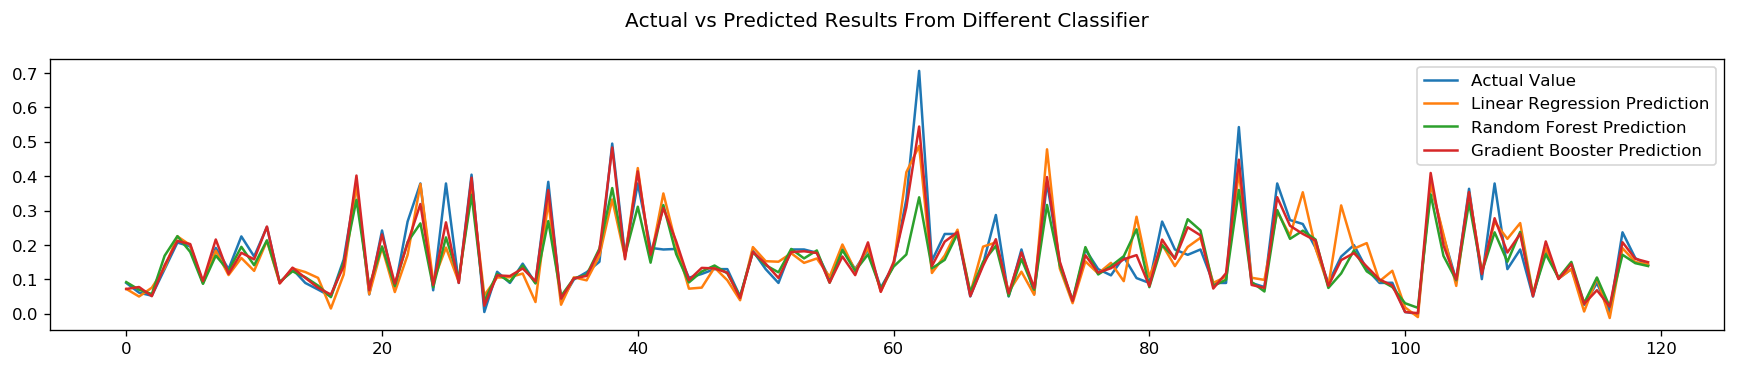

In [24]:
plt.figure(dpi=120, figsize=(18,3))

plt.title("Actual vs Predicted Results From Different Classifier\n") 
plt.plot(df_result['Actual Value']) 
plt.plot(df_result['Linear Regression Prediction'].apply(float))
plt.plot(df_result['Random Forest Prediction'].apply(float))
plt.plot(df_result['Gradient Booster Prediction'].apply(float))
plt.legend()
plt.show() 

<br>
### Result comparison between classifier
<ol>
    <li>Display R squared, Mean Squared Error, Mean Absolute Error results in table form</li>
    <li>Visualization for result comparison</li>
    </ol>
<br>

#### Comparison on R Squared

In [25]:
df_r2 = pd.DataFrame()

df_r2['Linear Regression R Squared'] = LRscorelist
df_r2['Random Forest R Squared'] = RFscorelist
df_r2['Gradient Booster R Squared'] = GBscorelist

df_r2.head(20)

,Linear Regression R Squared,Random Forest R Squared,Gradient Booster R Squared
0,0.738055,0.768635,0.861366
1,0.552583,0.774984,0.888161
2,0.791490,0.785023,0.881844
3,0.681932,0.813949,0.909023
4,0.650632,0.557535,0.761262
5,0.698834,0.707381,0.873863
6,0.690679,0.534672,0.746519
7,0.601726,0.547157,0.713331
8,0.743722,0.717208,0.892544
9,0.721384,0.761468,0.860744


#### Comparison on Mean Squared Error

In [26]:
df_mse = pd.DataFrame()

df_mse['Linear Regression MSE'] = LRmselist
df_mse['Random Forest MSE'] = RFmselist
df_mse['Gradient Booster MSE'] = GBmselist

df_mse.head(20)

,Linear Regression MSE,Random Forest MSE,Gradient Booster MSE
0,0.003486,0.003079,0.001845
1,0.005581,0.002807,0.001395
2,0.002541,0.002620,0.001440
3,0.004285,0.002507,0.001226
4,0.007592,0.009615,0.005188
5,0.002697,0.002620,0.001130
6,0.006682,0.010052,0.005475
7,0.006560,0.007459,0.004722
8,0.002981,0.003290,0.001250
9,0.004364,0.003736,0.002181


#### Comparison on Mean Absolute Error

In [27]:
df_mae = pd.DataFrame()

df_mae['Linear Regression MAE'] = LRmaelist
df_mae['Random Forest MAE'] = RFmaelist
df_mae['Gradient Booster MAE'] = GBmaelist

df_mae.head(20)

,Linear Regression MAE,Random Forest MAE,Gradient Booster MAE
0,0.039338,0.032871,0.024733
1,0.037297,0.031955,0.023031
2,0.035474,0.031709,0.021472
3,0.041455,0.032449,0.021112
4,0.043850,0.040225,0.028418
5,0.032967,0.030181,0.020321
6,0.042716,0.047359,0.032355
7,0.036495,0.038001,0.025996
8,0.036246,0.033687,0.020794
9,0.040196,0.032721,0.023832


#### Visualization of result from three different classifier

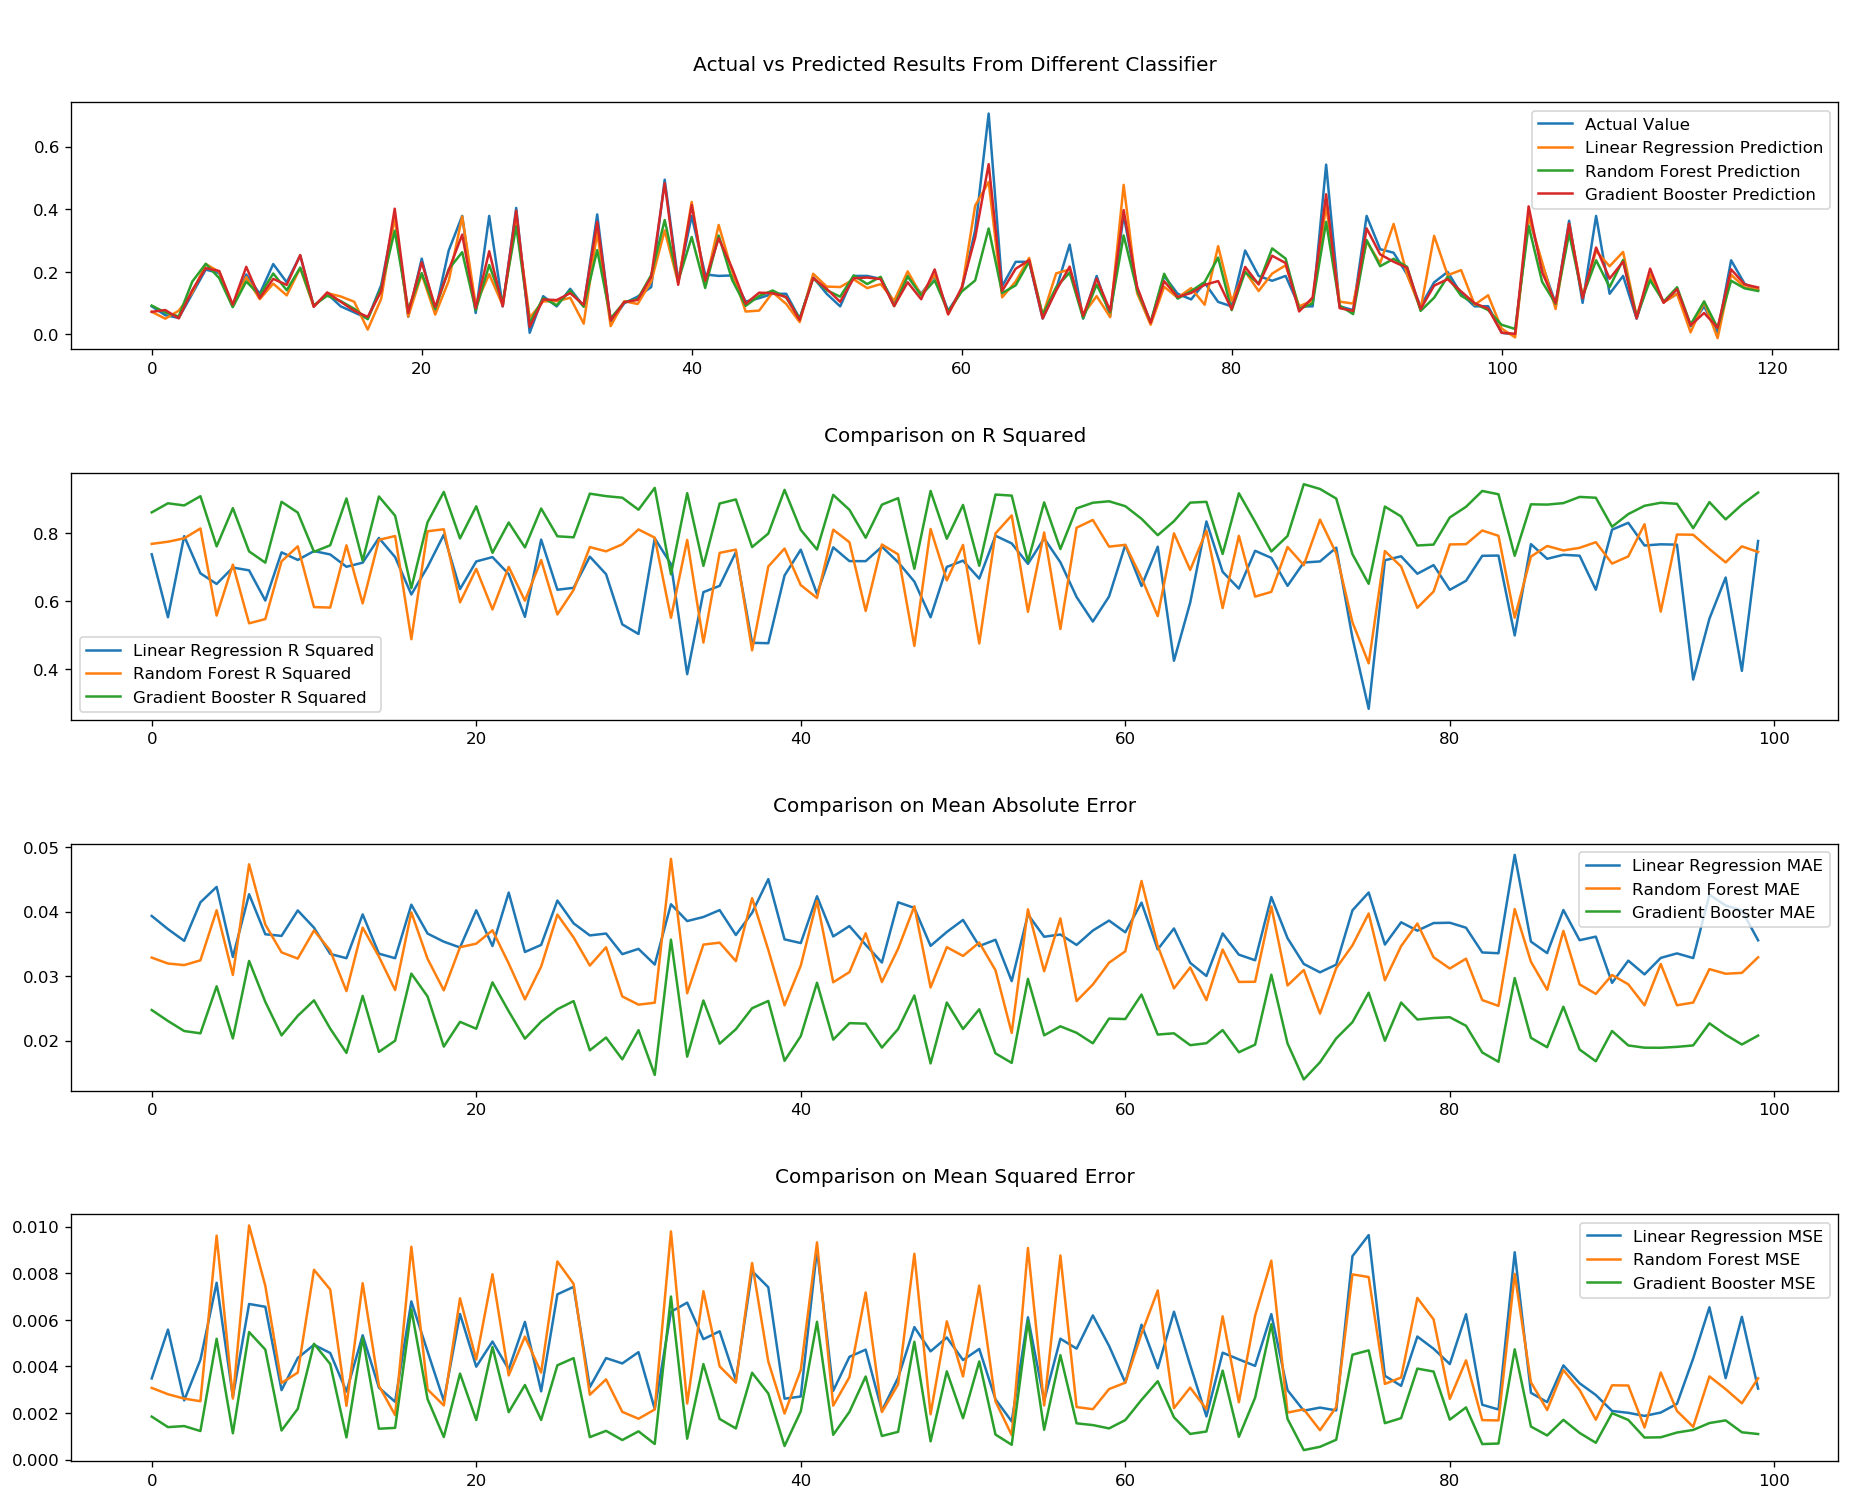

In [28]:
fig = plt.figure(dpi=120, figsize=(19,15))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

plt.subplot(4, 1, 1)
plt.title("\n\nActual vs Predicted Results From Different Classifier\n") 
plt.plot(df_result['Actual Value']) 
plt.plot(df_result['Linear Regression Prediction'].apply(float))
plt.plot(df_result['Random Forest Prediction'].apply(float))
plt.plot(df_result['Gradient Booster Prediction'].apply(float))
plt.legend()

plt.subplot(4, 1, 2)
plt.title("Comparison on R Squared\n") 
plt.plot(df_r2['Linear Regression R Squared'].apply(float))
plt.plot(df_r2['Random Forest R Squared'].apply(float))
plt.plot(df_r2['Gradient Booster R Squared'].apply(float))
plt.legend()

plt.subplot(4, 1, 3)
plt.title("Comparison on Mean Absolute Error\n") 
plt.plot(df_mae['Linear Regression MAE'].apply(float))
plt.plot(df_mae['Random Forest MAE'].apply(float))
plt.plot(df_mae['Gradient Booster MAE'].apply(float))
plt.legend()

plt.subplot(4, 1, 4)
plt.title("Comparison on Mean Squared Error\n") 
plt.plot(df_mse['Linear Regression MSE'].apply(float))
plt.plot(df_mse['Random Forest MSE'].apply(float))
plt.plot(df_mse['Gradient Booster MSE'].apply(float))
plt.legend()

plt.show()

<br>
#### Analyze the minimum and maximum of R squared, mse and mae from all classifiers

In [29]:
df_r2.describe()

,Linear Regression R Squared,Random Forest R Squared,Gradient Booster R Squared
count,100.000000,100.000000,100.000000
mean,0.674428,0.698169,0.840164
std,0.106576,0.107196,0.074420
min,0.282893,0.416913,0.638441
25%,0.633648,0.600005,0.784391
50%,0.709481,0.743499,0.872984
75%,0.743879,0.776300,0.895422
max,0.834610,0.852469,0.944374


In [30]:
df_mse.describe()

,Linear Regression MSE,Random Forest MSE,Gradient Booster MSE
count,100.000000,100.000000,100.000000
mean,0.004404,0.004342,0.002353
std,0.001852,0.002533,0.001640
min,0.001640,0.001052,0.000408
25%,0.002909,0.002323,0.001142
50%,0.004280,0.003303,0.001702
75%,0.005608,0.006927,0.003742
max,0.009639,0.010052,0.007002


In [31]:
df_mae.describe()

,Linear Regression MAE,Random Forest MAE,Gradient Booster MAE
count,100.000000,100.000000,100.000000
mean,0.036723,0.032567,0.022109
std,0.003760,0.005145,0.004003
min,0.028947,0.021182,0.013949
25%,0.033726,0.028722,0.019265
50%,0.036349,0.032020,0.021474
75%,0.039577,0.034930,0.024763
max,0.048831,0.048208,0.035658


In [32]:
df_temp = pd.DataFrame()
df_temp1 = pd.DataFrame()

#R2
df_temp = df_r2.min().to_frame().T
df_temp1 = df_r2.max().to_frame().T

df_RS = df_temp.append(df_temp1, ignore_index=True)
df_RS.insert(0, column='Value', value=['Min','Max'])

#MSE
df_temp = df_mse.min().to_frame().T
df_temp1 = df_mse.max().to_frame().T

df_MSE = df_temp.append(df_temp1, ignore_index=True)
df_MSE.insert(0, column='Value', value=['Min','Max'])

#MAE
df_temp = df_mae.min().to_frame().T
df_temp1 = df_mae.max().to_frame().T

df_MAE = df_temp.append(df_temp1, ignore_index=True)
df_MAE.insert(0, column='Value', value=['Min','Max'])

display (df_RS)
display (df_MSE)
display (df_MAE)

,Value,Linear Regression R Squared,Random Forest R Squared,Gradient Booster R Squared
0,Min,0.282893,0.416913,0.638441
1,Max,0.834610,0.852469,0.944374


,Value,Linear Regression MSE,Random Forest MSE,Gradient Booster MSE
0,Min,0.001640,0.001052,0.000408
1,Max,0.009639,0.010052,0.007002


,Value,Linear Regression MAE,Random Forest MAE,Gradient Booster MAE
0,Min,0.028947,0.021182,0.013949
1,Max,0.048831,0.048208,0.035658
